In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance



# check for null values

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

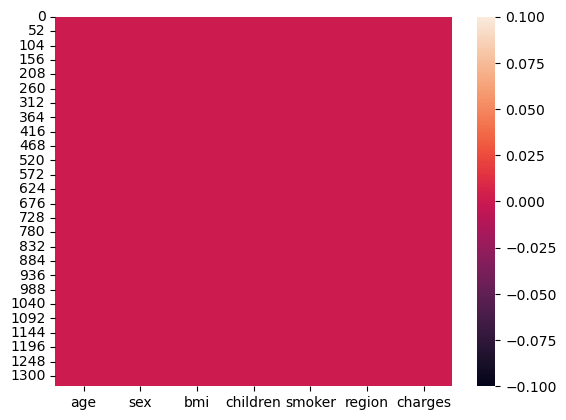

In [4]:
sns.heatmap(df.isnull())
plt.show()

There are NO null values

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
numerical = []
for i in df.columns:
    if df[i].dtypes != 'object' :
        numerical.append(i)
print(numerical)        

['age', 'bmi', 'children', 'charges']


Data is giving numerical continuous data in columns bmi , charges

Data is giving numerical discrete data in columns age , children

Data is giving categorical data in columns sex , smoker , region

In [8]:
#check for duplicated rows
print('number of duplicated rows is',df.duplicated().sum())

number of duplicated rows is 1


In [9]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(1337, 7)

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


the summury of data above gives us these insights:

    - in all columns mean isgreater than median 50% which says all data are skewed to left
    
    - in columns age , charges there is a huge difference between quantile 75% and max value sot there       are outliers 

# Data visualization

In [12]:
numerical = []
for i in df.columns:
    if df[i].dtypes != 'object':
        numerical.append(i)
print(numerical)        

['age', 'bmi', 'children', 'charges']


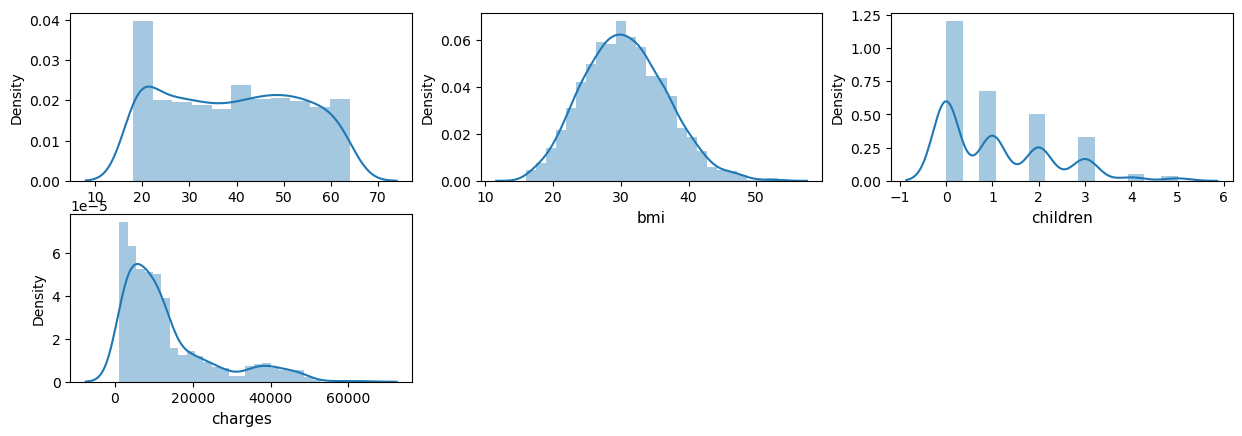

In [13]:
plt.figure(figsize=(15,10))
num = 1
for i in numerical :
    if num <= 7:
        ax = plt.subplot(4,3,num)
        sns.distplot(df[i])
        plt.xlabel(i , fontsize=11)
    num +=1
plt.show()    

columns age ande bmi have normal distribution 

columns children and charges are skewed to left

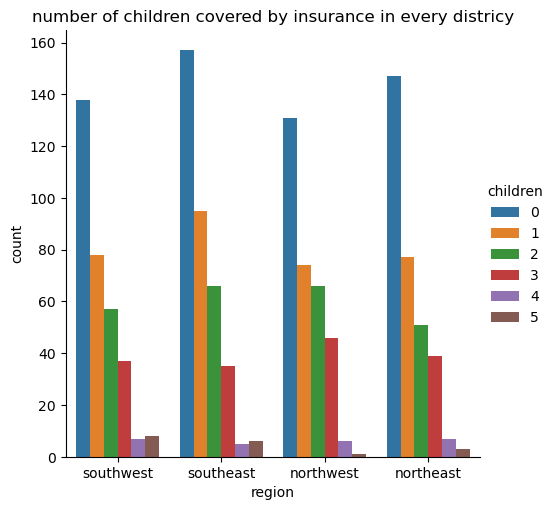

In [14]:

sns.catplot(x='region' ,hue ='children' , data=df , kind='count')
plt.title('number of children covered by insurance in every districy')
plt.show()

the more number of children covered by insurance increased , the less regions spend on them

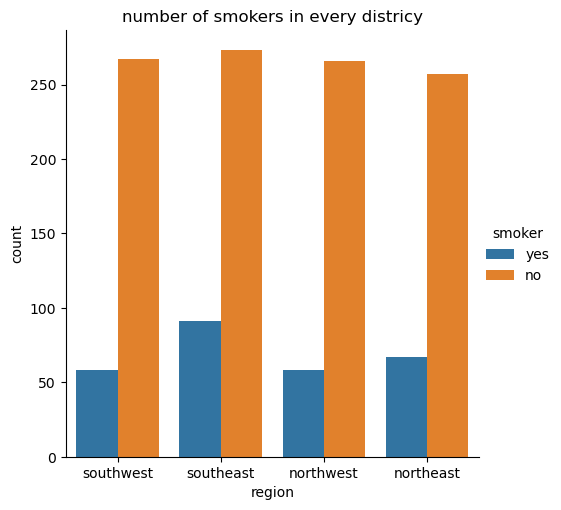

In [15]:
sns.catplot(x='region' ,hue ='smoker' , data=df , kind='count')
plt.title('number of smokers in every districy')
plt.show()

Southeast has the highest number of non smokers and the highest number of smokers so spending on insurance in it is more important

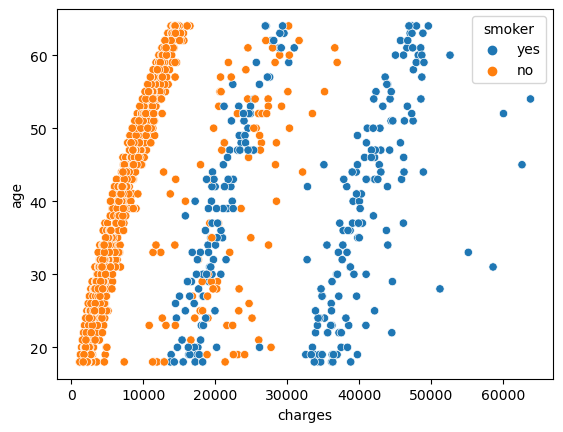

In [16]:
sns.scatterplot(x='charges' ,y='age' , hue='smoker' , data = df)
plt.show()

The more is age the more chrages increas for smokers

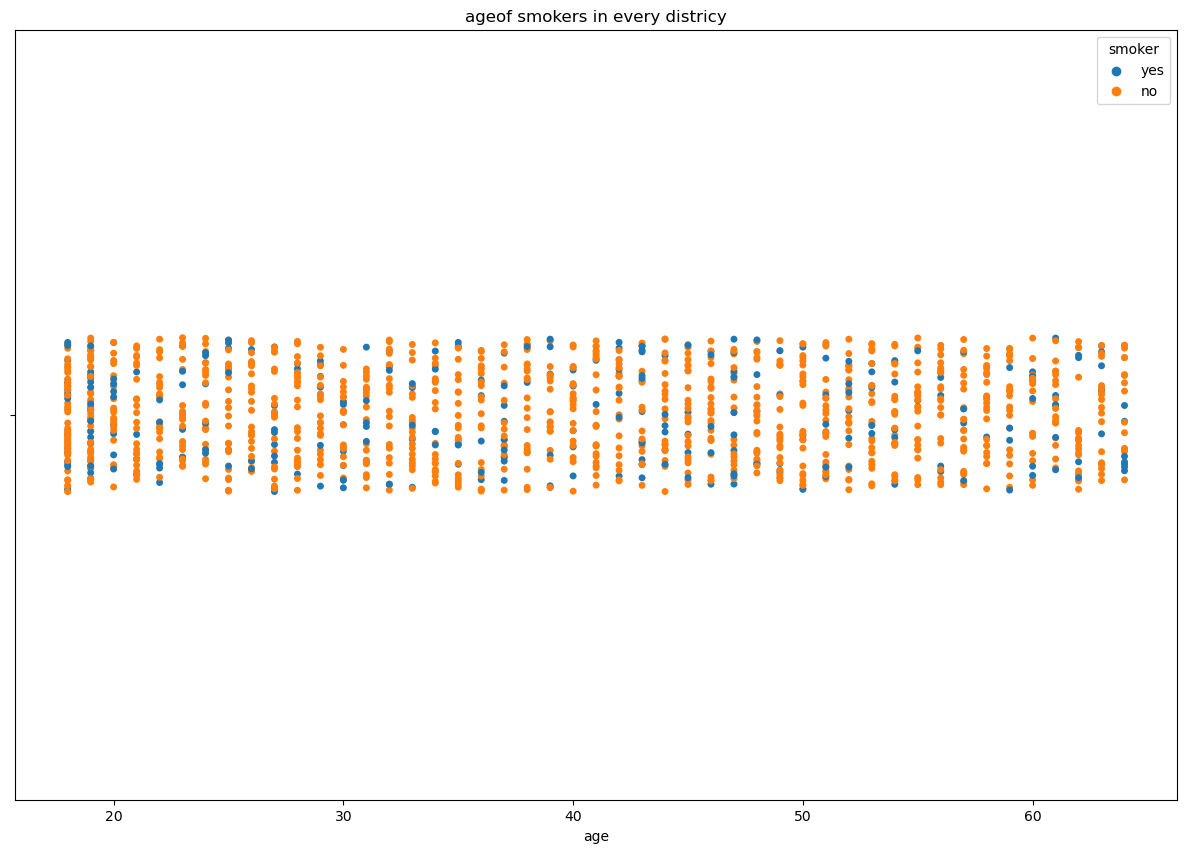

In [17]:
plt.figure(figsize=(15,10))
sns.stripplot(x='age' ,hue ='smoker' , data=df )
plt.title('ageof smokers in every districy')
plt.show()

ages between 40 and 50 are the highest number of smokers

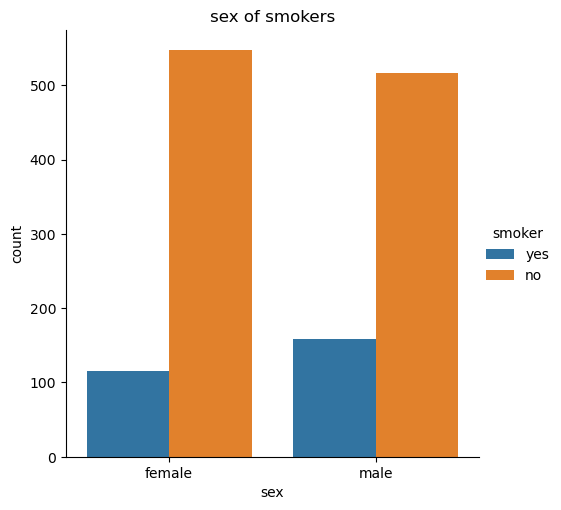

In [18]:
sns.catplot(x='sex' ,hue ='smoker' , data=df , kind='count')
plt.title('sex of smokers')
plt.show()

males are more smoking than females

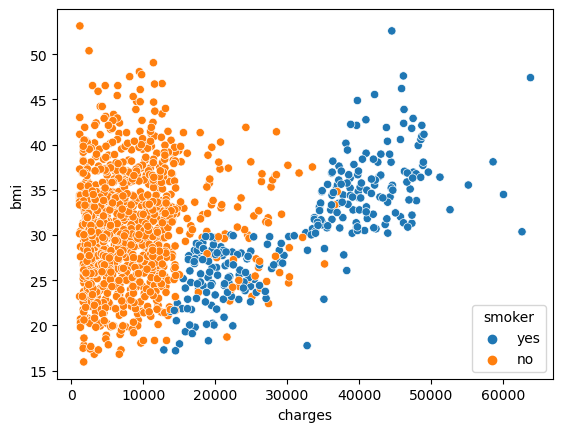

In [19]:
sns.scatterplot(x='charges' ,y='bmi' , hue='smoker' , data = df)
plt.show()

there is a strong relation between the increase of charges and bmi when more smokers are needing health insurance

so when number of smokers'bodies mass is deteriorating the more charges are spent on health insurance

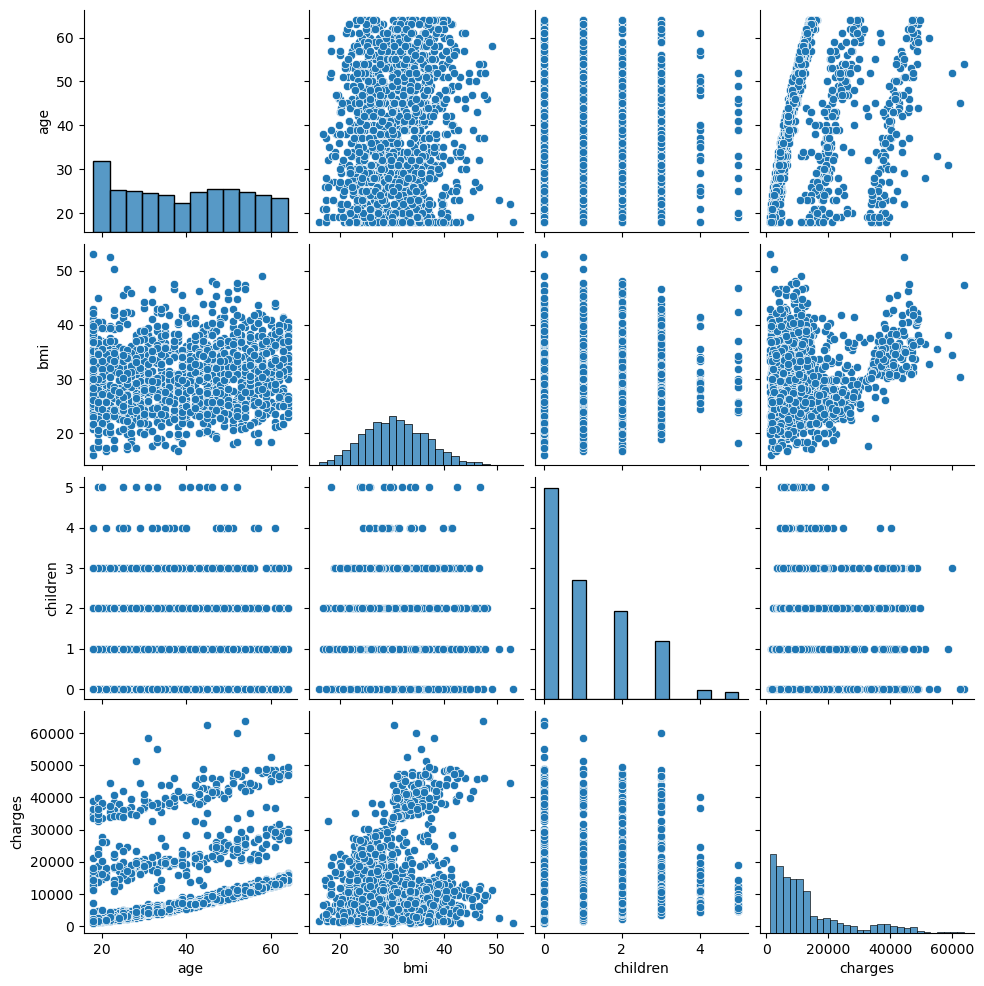

In [20]:
#show the relation between every column and others
sns.pairplot(df)
plt.show()

# removing outliers

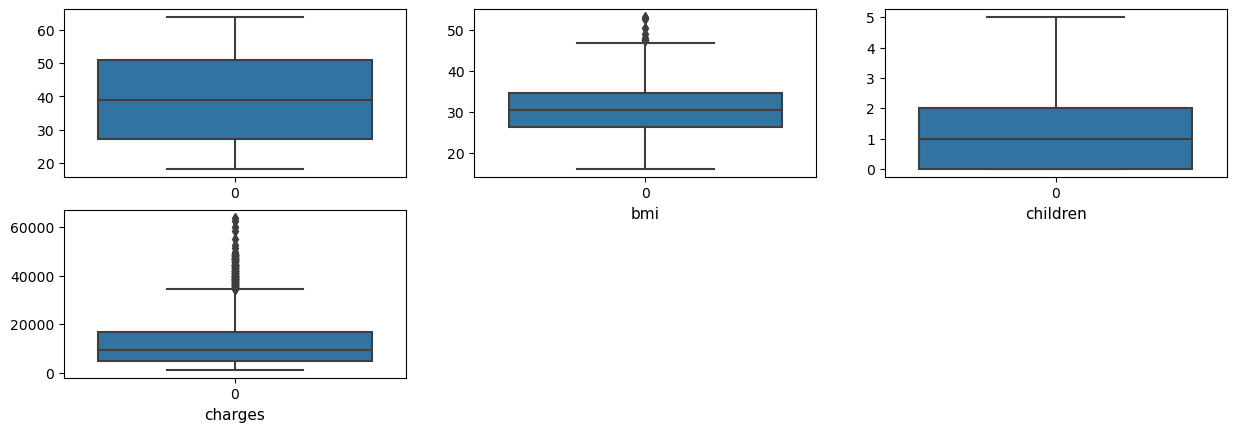

In [21]:
#show boxplot of numerical columns
plt.figure(figsize=(15,10))
num = 1
for i in numerical :
    if num <= 7:
        ax = plt.subplot(4,3,num)
        sns.boxplot(df[i])
        plt.xlabel(i , fontsize=11)
    num +=1
plt.show()    

we se outliers in columns bmi and charges which contains numerical continuous data so we will remove it

In [22]:
#using z score
from scipy.stats import zscore

In [23]:
outliers = df[['bmi' , 'charges']]
z = np.abs(zscore(outliers))

In [24]:
df1 = df[(z<3).all(axis = 1)]
df1.shape

(1326, 7)

In [25]:
print('percentage of loss is ',((df.shape[0] - df1.shape[0])/df.shape[0])*100)

percentage of loss is  0.8227374719521316


In [26]:
#use IQR
out = df[['bmi' , 'charges']]
#1st percentile
q1 = out.quantile(0.25)

#3rd percentile
q3 = out.quantile(0.75)

IQR = q3 - q1

df2 = df[~((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5*IQR))).any( axis =1)]

In [27]:
df2.shape

(1192, 7)

In [28]:
print('percentage of loss is ',((df.shape[0] - df2.shape[0])/df.shape[0])*100)

percentage of loss is  10.845175766641734


IQR method is the best method to remove outliers

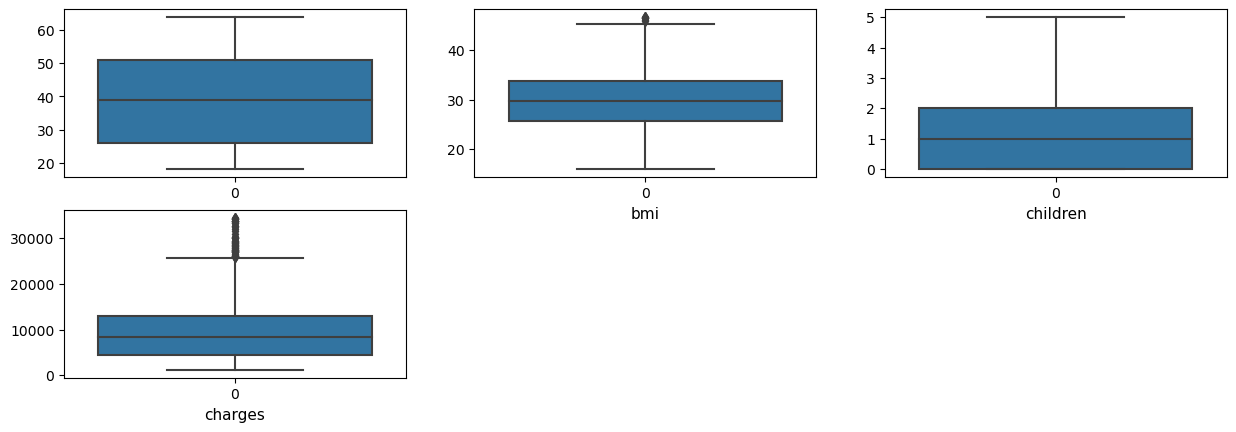

In [29]:
#show boxplot of numerical columns
plt.figure(figsize=(15,10))
num = 1
for i in numerical :
    if num <= 7:
        ax = plt.subplot(4,3,num)
        sns.boxplot(df2[i])
        plt.xlabel(i , fontsize=11)
    num +=1
plt.show()    

we see we have managed to remve outliers as possible as we can

# check skewness

In [30]:
df2.skew()

age         0.069809
bmi         0.262994
children    0.983973
charges     1.175678
dtype: float64

children has discrete data so no need to remove its skewness

we will imporve skewness of charges because it is continuous data

In [31]:
df2['charges'] = np.cbrt(df2['charges'])

In [32]:
df2.skew()

age         0.069809
bmi         0.262994
children    0.983973
charges     0.186794
dtype: float64

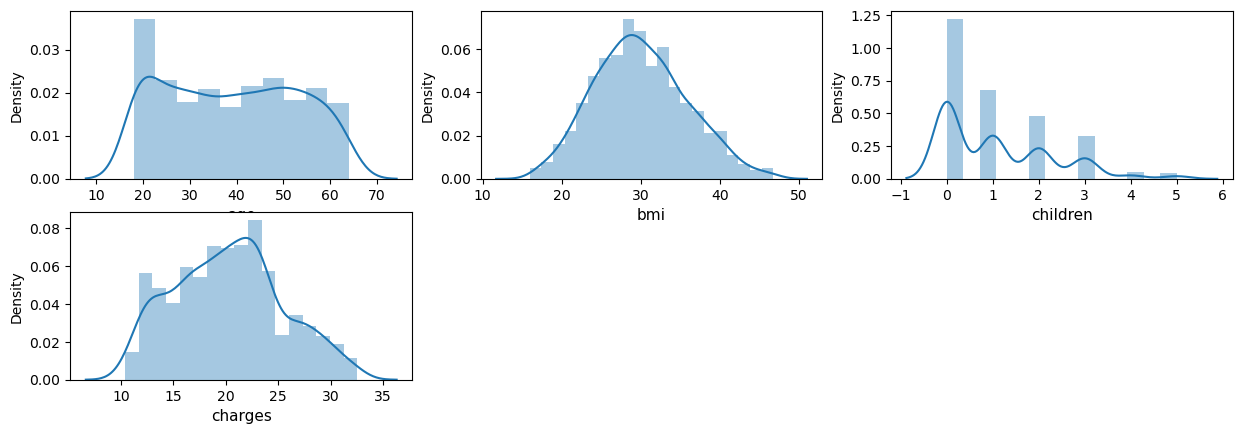

In [33]:
#we improved skewness of charges

plt.figure(figsize=(15,10))
num = 1
for i in numerical :
    if num <= 7:
        ax = plt.subplot(4,3,num)
        sns.distplot(df2[i])
        plt.xlabel(i , fontsize=11)
    num +=1
plt.show()    

# correlation

In [34]:
print(df2['sex'].value_counts(),'\n')
print(df2['smoker'].value_counts(),'\n')
print(df2['region'].value_counts())

female    611
male      581
Name: sex, dtype: int64 

no     1054
yes     138
Name: smoker, dtype: int64 

northwest    304
southeast    302
northeast    295
southwest    291
Name: region, dtype: int64


In [42]:
df2['sex'].replace({'female':0 , 'male':1} , inplace=True)
df2['smoker'].replace({'no':0 ,'yes':1} , inplace = True)
df2['region'].replace({'northwest':0 ,'southeast':1 , 'northeast':2 ,'southwest':3} , inplace=True)

In [46]:
print(df2['sex'].value_counts(),'\n')
print(df2['smoker'].value_counts(),'\n')
print(df2['region'].value_counts())

0    611
1    581
Name: sex, dtype: int64 

0    1054
1     138
Name: smoker, dtype: int64 

0    304
1    302
2    295
3    291
Name: region, dtype: int64


In [47]:
df2.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019950,0.122817,0.038948,-0.067880,0.012290,0.578694
sex,-0.019950,1.000000,0.016352,0.016284,0.014355,-0.001937,-0.042142
bmi,0.122817,0.016352,1.000000,0.006874,-0.256608,0.003634,-0.040569
children,0.038948,0.016284,0.006874,1.000000,-0.006307,0.005242,0.147704
smoker,-0.067880,0.014355,-0.256608,-0.006307,1.000000,-0.031305,0.532435
region,0.012290,-0.001937,0.003634,0.005242,-0.031305,1.000000,-0.031749
charges,0.578694,-0.042142,-0.040569,0.147704,0.532435,-0.031749,1.000000


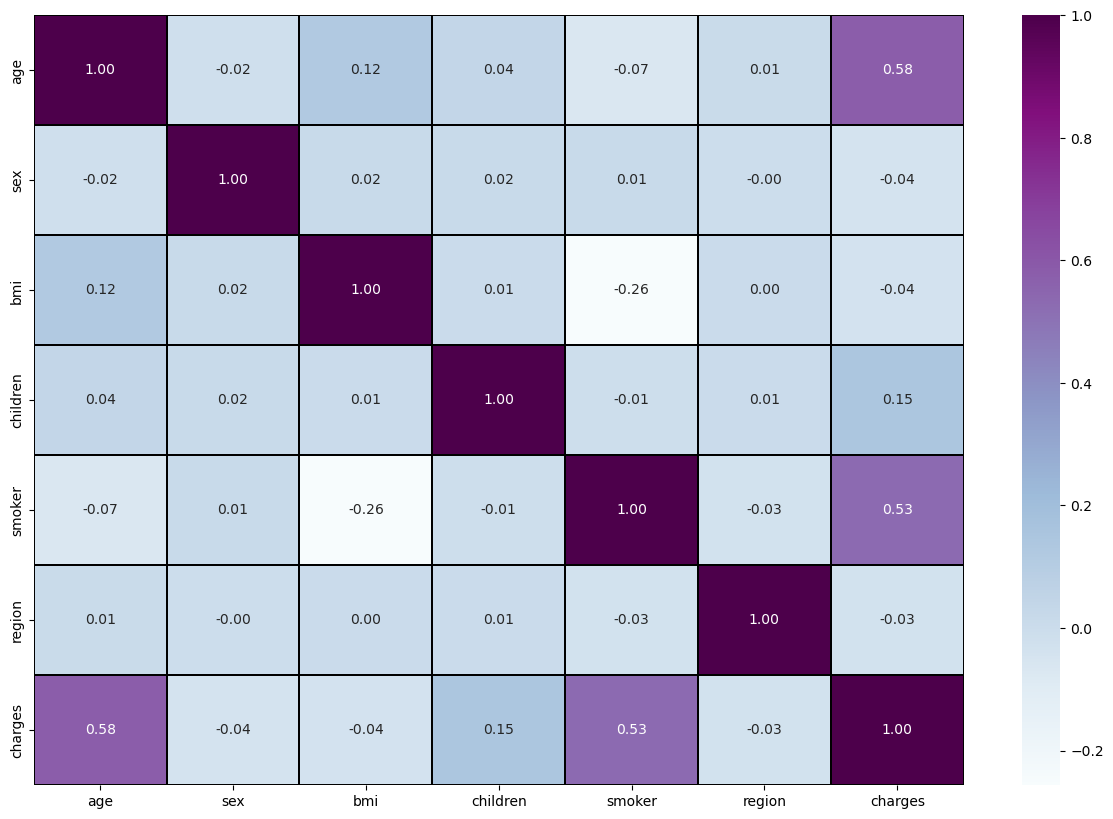

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr() ,annot = True , linewidth=0.1 ,cmap='BuPu' ,linecolor='black' , fmt='0.2f')
plt.show()

from above we see target varible charges has strong positive correlation with smoker and age

feature bmi and smoker have negative correlation

target varible charges has negative correlation with sex , bmi , region but not strong

In [52]:
df2.corr()['charges'].sort_values(ascending = False)

charges     1.000000
age         0.578694
smoker      0.532435
children    0.147704
region     -0.031749
bmi        -0.040569
sex        -0.042142
Name: charges, dtype: float64

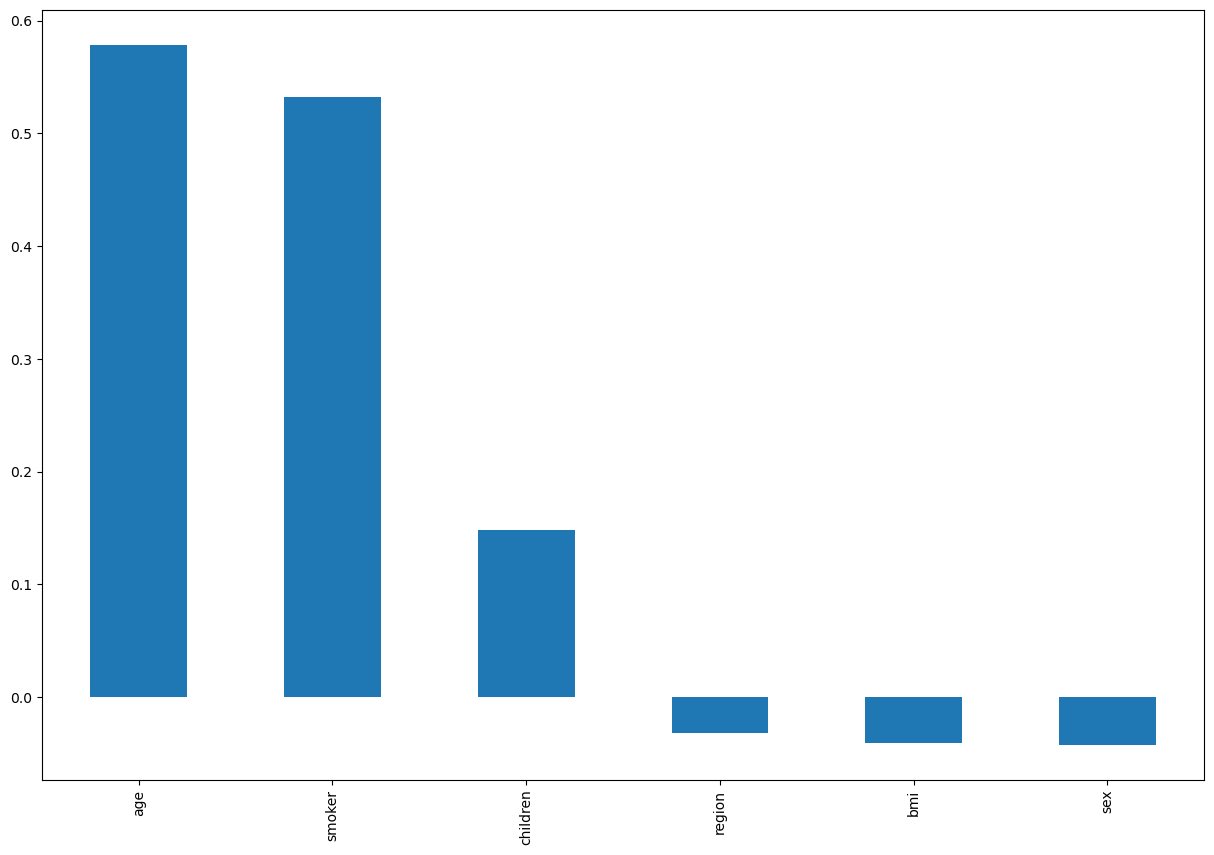

In [53]:
plt.figure(figsize=(15,10))
df2.corr()['charges'].sort_values(ascending = False).drop('charges').plot(kind = 'bar')
plt.show()

# scaling Data

In [54]:
x = df2.drop('charges',axis=1)
y = df2['charges']

In [55]:
print('features shape : ',x.shape)
print('label shape : ',y.shape)

features shape :  (1192, 6)
label shape :  (1192,)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
x_scaled = pd.DataFrame(scaler.fit_transform(x) , columns = x.columns)
x_scaled

,age,sex,bmi,children,smoker,region
0,-1.423210,-0.975141,-0.357608,-0.893545,2.763635,1.360015
1,-1.494377,1.025493,0.642929,-0.071070,-0.361842,-0.430308
2,-0.782712,1.025493,0.511683,1.573881,-0.361842,-0.430308
3,-0.426879,1.025493,-1.243092,-0.893545,-0.361842,-1.325470
4,-0.498046,1.025493,-0.190568,-0.893545,-0.361842,-1.325470
...,...,...,...,...,...,...
1187,0.782951,1.025493,0.165671,1.573881,-0.361842,-1.325470
1188,-1.494377,-0.975141,0.327598,-0.893545,-0.361842,0.464853
1189,-1.494377,-0.975141,1.167913,-0.893545,-0.361842,-0.430308
1190,-1.280877,-0.975141,-0.715552,-0.893545,-0.361842,1.360015


In [64]:
x_scaled.shape

(1192, 6)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif['VIF Value'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['columns'] = x_scaled.columns
vif

,VIF Value,columns
0,1.018875,age
1,1.001390,sex
2,1.084040,bmi
3,1.001849,children
4,1.073434,smoker
5,1.001141,region


ALL columns VIF are less than 10 so there is NO multicollineraity problem so we can move ahead with data

# Building Model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [69]:
#find the best random state

max_accu = 0
max_state = 0
for i in range(1,200):
    x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , random_state = i , test_size=0.3)
    lr = LinearRegression()
    lr.fit(x_train , y_train)
    y_pred = lr.predict(x_test)
    accuracy = r2_score(y_test , y_pred)
    
    if accuracy < max_accu :
        accuracy = max_accu
        max_state = i
print('the best accuracy is {} when random stats is {}'.format(accuracy , i))        

the best accuracy is 0.7491037069822725 when random stats is 199


In [74]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , random_state = 199 , test_size=0.3)

In [75]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso , Ridge
from sklearn.svm import SVR

In [76]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
et = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
las = Lasso()
ri = Ridge()
svr = SVR()

In [80]:
models = {'LinearRegression':lr ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr}
for name , m in models.items():
    m.fit(x_train , y_train)
    pred_train= m.predict(x_train)
    pred_text = m.predict(x_test)
    print('model name is : ',name)
    print('accuracy score on test data is: ','{:.2f}'.format(r2_score(y_test ,pred_text)*100),' %')
    print('accuracy score on train data is: ','{:.2f}'.format(r2_score(y_train ,pred_train)*100),' %')
    print('mean absolute error is : ',mean_absolute_error(y_test ,pred_text))
    print('mean squared error is : ',mean_squared_error(y_test ,pred_text))
    print('Root mean squared is ',np.sqrt(mean_squared_error(y_test ,pred_text)))
    print('\n')

model name is :  LinearRegression
accuracy score on test data is:  74.91  %
accuracy score on train data is:  65.06  %
mean absolute error is :  1.5757977837113664
mean squared error is :  6.8348301009950365
Root mean squared is  2.614350799145944


model name is :  RandomForestRegressor
accuracy score on test data is:  74.52  %
accuracy score on train data is:  94.67  %
mean absolute error is :  1.5753761258232308
mean squared error is :  6.942368774018475
Root mean squared is  2.6348375232675116


model name is :  GradientBoostingRegressor
accuracy score on test data is:  78.56  %
accuracy score on train data is:  79.21  %
mean absolute error is :  1.427560615610514
mean squared error is :  5.841922689968911
Root mean squared is  2.417006969367054


model name is :  ExtraTreesRegressor
accuracy score on test data is:  69.14  %
accuracy score on train data is:  100.00  %
mean absolute error is :  1.4965169361619666
mean squared error is :  8.406373157602712
Root mean squared is  2.899

SVR Model has the best accuracy

In [83]:
from sklearn.model_selection import cross_val_score

In [88]:
score = cross_val_score(lr , x_scaled , y ,cv=5 ,scoring ='r2')
mean = score.mean()
print(score)
print(mean)
print('Difference between r2 score and cross validation score is ',(r2_score(y_test,lr.predict(x_test)) - mean)*100)

[0.75701192 0.57078884 0.76744666 0.65881693 0.63615295]
0.6780434576565325
Difference between r2 score and cross validation score is  7.1060249325739955


In [90]:
models = {'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr}
for name , m in models.items():
    score = cross_val_score(m , x_scaled , y ,scoring ='r2')
    print('model name is :' ,name)
    mean = score.mean()
    print(score)
    print(mean)
    print('Difference between r2 score and cross validation score is ',(r2_score(y_test,m.predict(x_test)) - mean)*100)
    print('\n')

model name is : RandomForestRegressor
[0.72204868 0.52480325 0.7357059  0.69980874 0.66178657]
0.6688306268181533
Difference between r2 score and cross validation score is  7.6325497851327135


model name is : GradientBoostingRegressor
[0.77412749 0.58663563 0.79128152 0.71440523 0.7041369 ]
0.7141173555232487
Difference between r2 score and cross validation score is  7.143448331529578


model name is : ExtraTreesRegressor
[0.67104917 0.47612695 0.693284   0.66619008 0.64469194]
0.6302684292908629
Difference between r2 score and cross validation score is  6.114630497455864


model name is : DecisionTreeRegressor
[0.43468612 0.37808553 0.4471036  0.53267058 0.29954337]
0.41841784010970784
Difference between r2 score and cross validation score is  -0.4589280381537386


model name is : KNeighborsRegressor
[0.7308597  0.50742062 0.7056503  0.66632872 0.65823743]
0.6536993542600052
Difference between r2 score and cross validation score is  8.608434840758827


model name is : Lasso
[0.629396

DecisionTreeRegressor has the less difference but it has the least accuracy which make the model more fitting but with less acuuracy and in consideration of having categorical data that have skewness so we will use the best accuracy model Linear Regression which has less positive difference and a good accuracy and more common in prediction

In [127]:
lr.fit(x_train , y_train)
pred_train= lr.predict(x_train)
pred_text = lr.predict(x_test)

print('accuracy score on test data is: ','{:.2f}'.format(r2_score(y_test ,pred_text)*100),' %')
print('accuracy score on train data is: ','{:.2f}'.format(r2_score(y_train ,pred_train)*100),' %')
print('mean absolute error is : ',mean_absolute_error(y_test ,pred_text))
print('mean squared error is : ',mean_squared_error(y_test ,pred_text))
print('Root mean squared is ',np.sqrt(mean_squared_error(y_test ,pred_text)))
print('\n')

accuracy score on test data is:  74.91  %
accuracy score on train data is:  65.06  %
mean absolute error is :  1.5757977837113664
mean squared error is :  6.8348301009950365
Root mean squared is  2.614350799145944




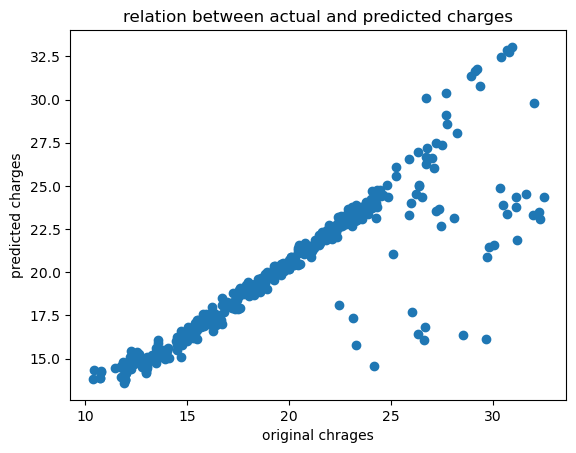

In [146]:
plt.title('relation between actual and predicted charges')
plt.scatter(y_test ,lr.predict(x_test) )
plt.xlabel('original chrages')
plt.ylabel('predicted charges')
plt.show()

There is a descriptive positive relation between original and predited charges which means model's accuracy is good

In [137]:
#predict
df2.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,25.654666
1,18,1,33.770,1,0,1,11.994331
2,28,1,33.000,3,0,1,16.447599
3,33,1,22.705,0,0,0,28.013799
4,32,1,28.880,0,0,0,15.695891
5,31,0,25.740,0,0,1,15.545302
6,46,0,33.440,1,0,1,20.198514
7,37,0,27.740,3,0,0,19.382378
8,37,1,29.830,2,0,2,18.572552
9,60,0,25.840,0,0,0,30.696001


In [141]:
print('predicted charges of 30.696001 is ',lr.predict(scaler.transform([[60,0,25.840,0,0,0]])))

predicted charges of 30.696001 is  [23.37590784]


In [143]:
print('predicted charges of 18.572552 is ',lr.predict(scaler.transform([[37 ,1 ,29.830,2,0 ,2]])))

predicted charges of 18.572552 is  [19.08976594]


In [144]:
print('predicted charges of 11.994331 is ',lr.predict(scaler.transform([[18,1,33.770,1,0,1]])))

predicted charges of 11.994331 is  [14.6324004]


In [148]:
#save model
import joblib
joblib.dump(lr ,'Medical Cost Personal Insurance.pkl')

['Medical Cost Personal Insurance.pkl']